# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Import the needed libraries

import pickle
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#import cv2
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from IPython.display import display

In [2]:
# Load pickled data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print("Shapes of:")
print("\n   X_train, y_train:   ", X_train.shape, y_train.shape)
print("\n   X_valid, y_valid:   ", X_valid.shape, y_valid.shape)
print("\n   X_test, y_test:     ", X_test.shape, y_test.shape)

Shapes of:

   X_train, y_train:    (34799, 32, 32, 3) (34799,)

   X_valid, y_valid:    (4410, 32, 32, 3) (4410,)

   X_test, y_test:      (12630, 32, 32, 3) (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
image_shape = image.shape

# How many unique classes/labels there are in the dataset.    
df = pd.read_csv('signnames.csv', delimiter=',')
n_classes = df.shape[0]

# Create a list of names for each sign.
sign_names = []
for index, row in df.iterrows():
    sign_names.append(row['SignName'])
    
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Pretty print of Class IDs and Sign Names.
print("\nThe Class IDs and their corresponding Sign Names:")
display(df) 

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

The Class IDs and their corresponding Sign Names:


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
# Data exploration and visualization.
# Visualizations will be shown in the notebook.

Class counts: 
 [180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]

Validation count 34799


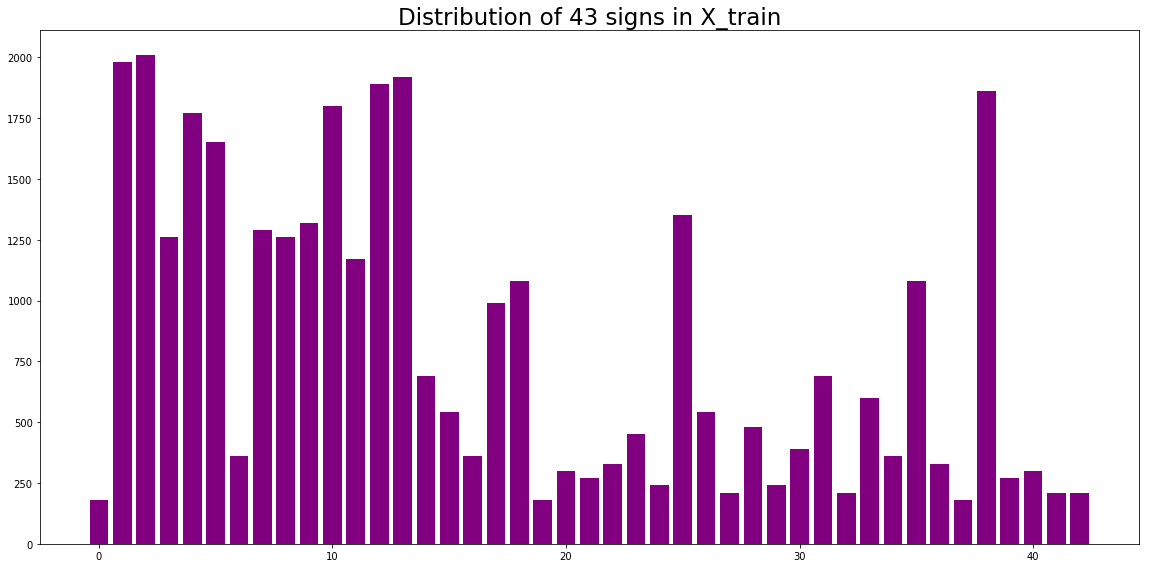

In [5]:
# Plot how many signs of each class in training data 

validation_count = 0
class_count = [0 for x in range (n_classes)]

for i in range (0,len(y_train)):
    class_count[y_train[i]] += 1
print("Class counts: \n", class_count)

# Verify that the counts for each sign matches the total count in y_train
for i in class_count:
    validation_count += i
print("\nValidation count", validation_count)
assert(validation_count == len(y_train))

# Plot the distribution of the counts for each of the signs.
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 8))
ax0.set_title('Distribution of 43 signs in X_train', fontsize=23)
fig.tight_layout()
xaxis = range(n_classes)
ax0.bar(xaxis, class_count, color="purple")
plt.show()

In [6]:
# This function plots images with their labels
# Argumens:
#      rows: number of rows for the plot.
#      cols: number of columns for the plot.
#     image: input image
#    labels: the labes associated with the images.

def plot_images_labels(rows=1, cols=4, image=None, labels=None):
    for i, img in enumerate(image):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        xlabel = '{}'.format(labels[i])
        plt.xlabel(xlabel, fontsize=23)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show


                                     The 43 road signs with their Class IDs


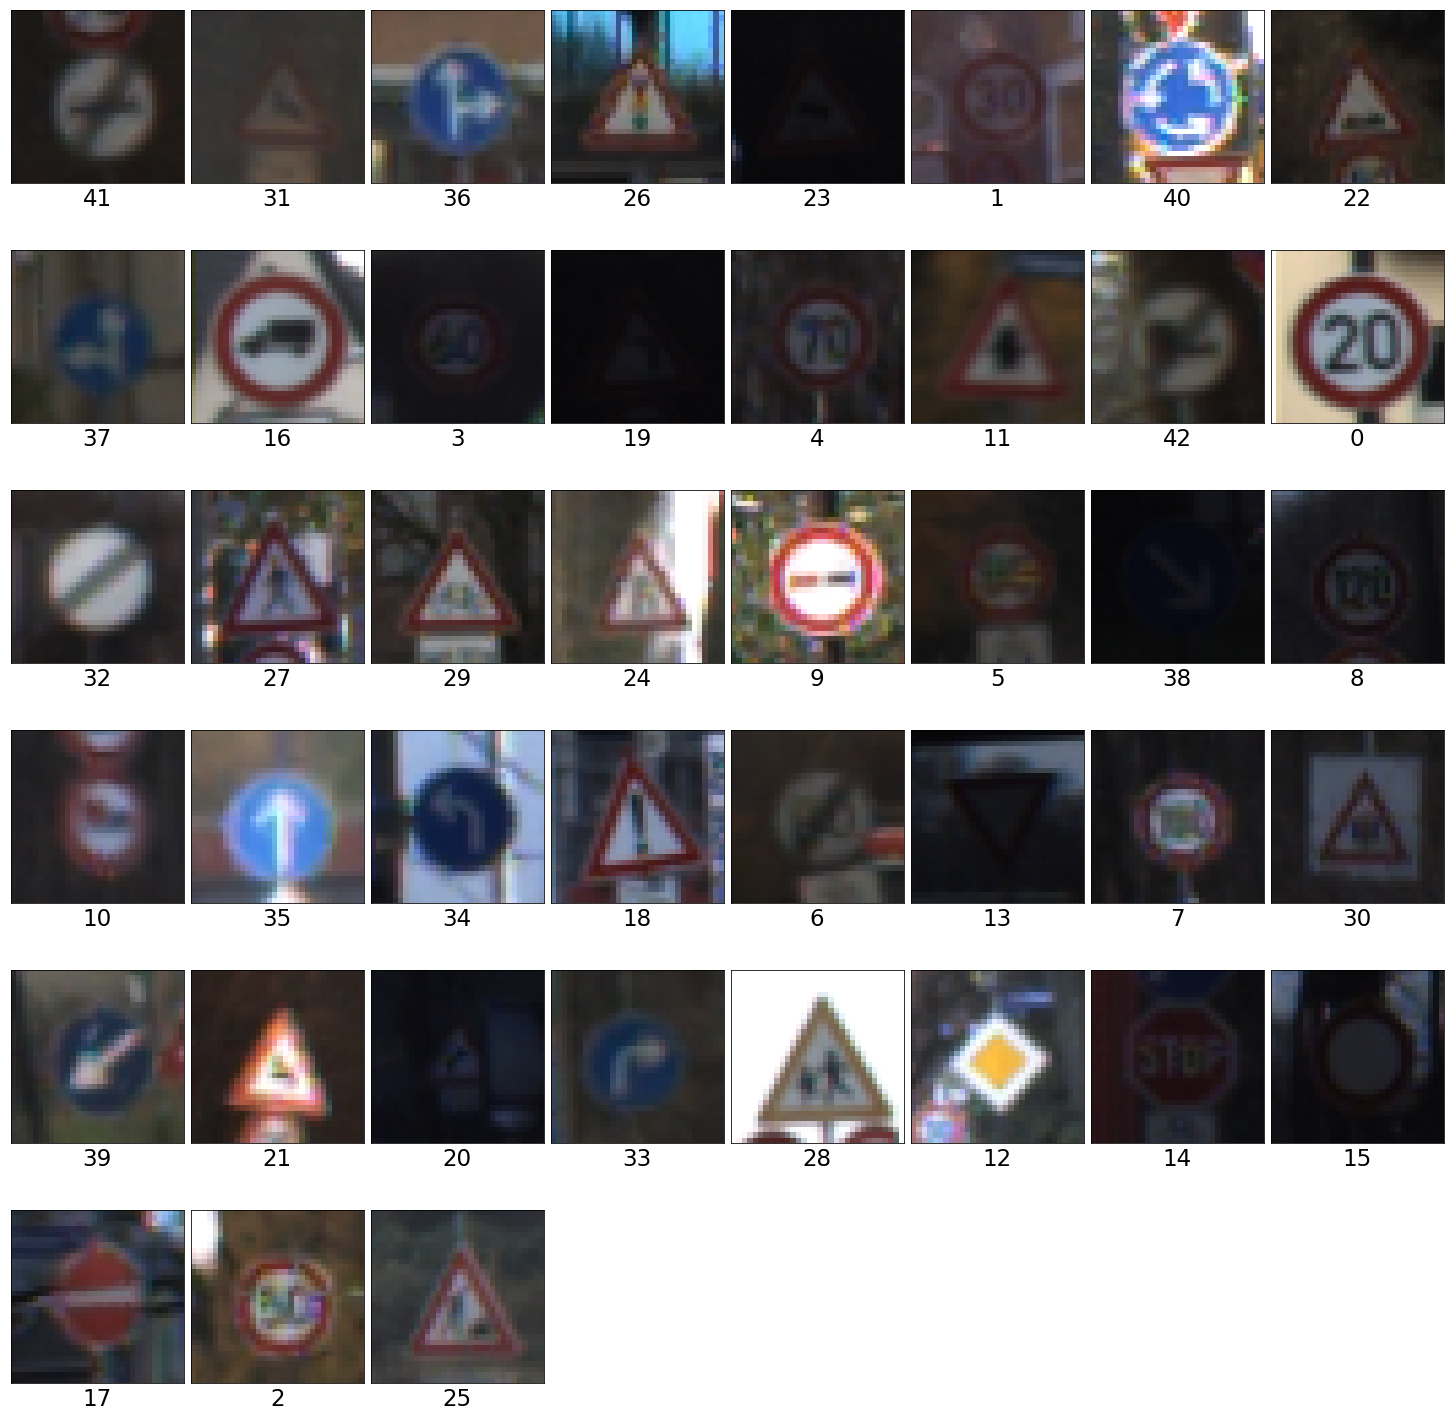

In [7]:
# Plot all the 43 sign images
cols = 8
rows = (n_classes // cols) + 1 

plt.figure(figsize=(20,20))

sample_images = []
labels = []
class_present = [0 for x in range (n_classes)]

for i in range (0,len(y_train)):
    if class_present[y_train[i]] == 0:
        sample_images.append(X_train[i].squeeze())
        class_present[y_train[i]] += 1
        labels.append(y_train[i])
        if len(sample_images) == n_classes:
            break
print()
print('\033[1m                                     The 43 road signs with their Class IDs')
plot_images_labels(6, 8, sample_images, labels)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Shapes of:
X_train: RGB, Gray (34799, 32, 32, 3) (34799, 32, 32, 1)
X_valid: RGB, Gray (4410, 32, 32, 3) (4410, 32, 32, 1)
X_test: RGB, Gray (12630, 32, 32, 3) (12630, 32, 32, 1)


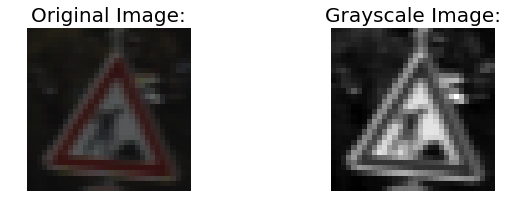

In [8]:
# Convert the color images to grayscale
# Simple average of RGB channels 

X_train_orig = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_orig = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_orig = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print("Shapes of:")
print('X_train: RGB, Gray', X_train_orig.shape, X_train_gray.shape)
print('X_valid: RGB, Gray', X_valid_orig.shape, X_valid_gray.shape)
print('X_test: RGB, Gray', X_test_orig.shape, X_test_gray.shape)


# Note: Display a sample Grayscale Image
original_test_image = X_train[34336]
grayscale_test_image = X_train_gray[34336]

fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].axis('off')
axs[0].imshow(original_test_image.squeeze())
axs[0].set_title('Original Image:', fontsize=20)

axs[1].axis('off')
axs[1].imshow(grayscale_test_image.squeeze(), cmap='gray')
axs[1].set_title('Grayscale Image:', fontsize=20)


# Experimented with converting the images to grayscale and 
# it didn't really make a big differene in validation accuracy
# Commenting out the following 3 lines.
#X_train = X_train_gray
#X_test = X_test_gray
#X_valid = X_valid_gray

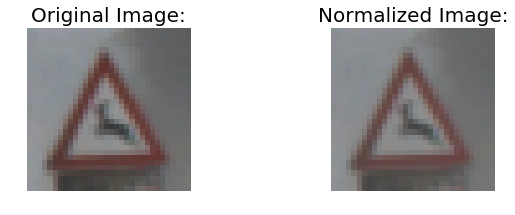

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

def normalize(image_data):
    out_image = []
    range_a = 0.1
    range_b = 0.9
    x_min = 0
    x_max = 255
    for n in image_data:
        scaled = range_a + (((n - x_min)*(range_b - range_a)) / (x_max - x_min))
        out_image.append(scaled)
    return out_image

original_image = X_train[555]

# Normalize the Training, Validation and Test data sets
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

# Note: Display a sample Normalized Image
normalized_test_image = X_train[555]

fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].axis('off')
axs[0].imshow(original_image.squeeze())
axs[0].set_title('Original Image:', fontsize=20)

axs[1].axis('off')
axs[1].imshow(normalized_test_image.squeeze())
axs[1].set_title('Normalized Image:', fontsize=20)

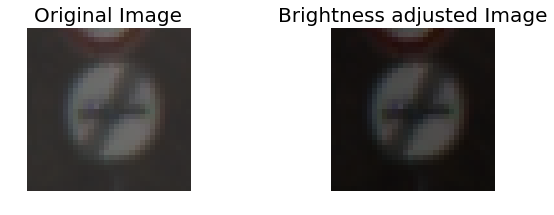

In [10]:
# This function adjusts teh brightness of an image
# randomly using the tf.image.random_brightness()
# The brightness is increased or decreased randomly
# using a range of -max_delta to +max_delta

def random_brightness(image):
    return tf.image.random_brightness(image, max_delta=50.0, seed=20)


# Display a brightness adjusted sample image
test_image = X_train[5]
bright_image = random_brightness(test_image)

img_tf = tf.Variable(bright_image)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
im = sess.run(img_tf)

fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].axis('off')
axs[0].imshow(test_image.squeeze())
axs[0].set_title('Original Image', fontsize=20)

axs[1].axis('off')
axs[1].imshow(im.squeeze())
axs[1].set_title('Brightness adjusted Image', fontsize=20)

# Note
# Experimented with using and not using this function.
# Currently, this function is not being used.

In [11]:
# Shuffle the training data

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [13]:
### LeNet Architecture.

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob = 0.8
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='Convolution1') + conv1_b

    # ReLU Activation.
    conv1_relu = tf.nn.relu(conv1)
        
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1_maxpool = tf.nn.max_pool(conv1_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1_maxpool, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='Convolution2') + conv2_b

    # ReLU Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # ReLU Activation.
    fc1    = tf.nn.relu(fc1)

    # Dropout 1  With dropout validation accuracy drops below 0.93. Not using it.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # ReLU Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout 2. With dropout validation accuracy drops below 0.93 Not using it.
    #fc2 = tf.nn.dropout(fc2, keep_prob)
        
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

In [15]:
EPOCHS = 10
BATCH_SIZE = 128

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [17]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# This function evaulates the acuuracy of Network model.

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './my-model-graph')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.589
Validation Accuracy = 0.526

EPOCH 2 ...
Training Accuracy = 0.765
Validation Accuracy = 0.694

EPOCH 3 ...
Training Accuracy = 0.844
Validation Accuracy = 0.772

EPOCH 4 ...
Training Accuracy = 0.879
Validation Accuracy = 0.795

EPOCH 5 ...
Training Accuracy = 0.917
Validation Accuracy = 0.831

EPOCH 6 ...
Training Accuracy = 0.935
Validation Accuracy = 0.841

EPOCH 7 ...
Training Accuracy = 0.942
Validation Accuracy = 0.848

EPOCH 8 ...
Training Accuracy = 0.945
Validation Accuracy = 0.863

EPOCH 9 ...
Training Accuracy = 0.951
Validation Accuracy = 0.866

EPOCH 10 ...
Training Accuracy = 0.966
Validation Accuracy = 0.883

Model saved


In [20]:
# Test the model
# The test dataset has been already normalized in an earlier cell.
with tf.Session() as sess:
    test_saver = tf.train.import_meta_graph('my-model-graph.meta')
    test_saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.873


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Downloaded images after they are cropped and resized to 32x32


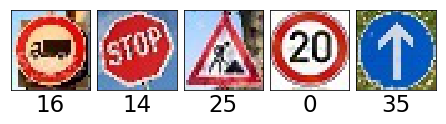

In [30]:
### Load the images and plot them here.

img_path = os.listdir('./myImages/')
my_images = []

for image in img_path:
    img = mpimg.imread(os.path.join('myImages', image)) 
    my_images.append(img)   
my_images = np.asarray(my_images)
my_labels = np.array([16,14,25,0,35])
print("Downloaded images after they are cropped and resized to 32x32")
plot_images_labels(1, 5, my_images, my_labels)

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

Downloaded images after they are normalized
New Images Accuracy = 0.600


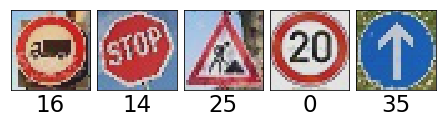

In [31]:
# Normalize the new images
my_images = normalize(my_images)

print("Downloaded images after they are normalized")
plot_images_labels(1, 5, my_images, my_labels)

# Restore the saved model graph and predict the sign for the new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    my_saver = tf.train.import_meta_graph('./my-model-graph.meta')
    my_saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images, my_labels)
    print("New Images Accuracy = {:.3f}".format(my_accuracy))

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy_percentage = my_accuracy*100.0
print("New images accuracy percentage:", int(accuracy_percentage))

New images accuracy percentage: 60


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./my-model-graph.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images})
    my_top_k = sess.run(top_k, feed_dict={x: my_images})

    
print(my_top_k)

TopKV2(values=array([[  6.96134627e-01,   3.03860664e-01,   2.18674518e-06,
          2.15228442e-06,   3.74021283e-07],
       [  8.08085501e-01,   1.41523808e-01,   2.38512233e-02,
          1.77450459e-02,   7.96513725e-03],
       [  9.98784840e-01,   1.18250761e-03,   1.75857713e-05,
          8.91783293e-06,   5.74832711e-06],
       [  5.95660508e-01,   3.07690680e-01,   9.12607759e-02,
          5.36960410e-03,   1.63554832e-05],
       [  1.00000000e+00,   1.93501546e-13,   1.01252127e-15,
          6.03165999e-18,   3.79070612e-18]], dtype=float32), indices=array([[16, 42, 40, 41, 11],
       [14,  1, 17,  0, 22],
       [25, 24, 18, 26, 29],
       [ 3,  1,  5,  6,  0],
       [35, 34, 41,  5,  9]]))


In [26]:
new_image_dframe = []
for i in range(5):
    new_image_dframe.append(list(zip(my_top_k.indices[i], list(df.iloc[my_top_k.indices[i]].SignName), my_top_k.values[i])))

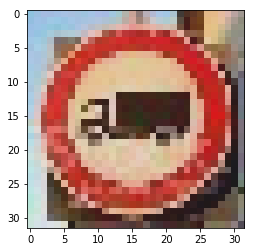

Vehicles over 3.5 metric tons prohibited
----------------------------------------------------------------------------------------------------
   ClassID                                           SignName  Probabilities
1       16           Vehicles over 3.5 metric tons prohibited   6.961346e-01
2       42  End of no passing by vehicles over 3.5 metric ...   3.038607e-01
3       40                               Roundabout mandatory   2.186745e-06
4       41                                  End of no passing   2.152284e-06
5       11              Right-of-way at the next intersection   3.740213e-07
----------------------------------------------------------------------------------------------------


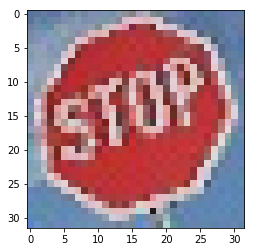

Stop
----------------------------------------------------------------------------------------------------
   ClassID              SignName  Probabilities
1       14                  Stop       0.808086
2        1  Speed limit (30km/h)       0.141524
3       17              No entry       0.023851
4        0  Speed limit (20km/h)       0.017745
5       22            Bumpy road       0.007965
----------------------------------------------------------------------------------------------------


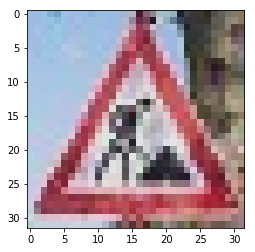

Road work
----------------------------------------------------------------------------------------------------
   ClassID                   SignName  Probabilities
1       25                  Road work       0.998785
2       24  Road narrows on the right       0.001183
3       18            General caution       0.000018
4       26            Traffic signals       0.000009
5       29          Bicycles crossing       0.000006
----------------------------------------------------------------------------------------------------


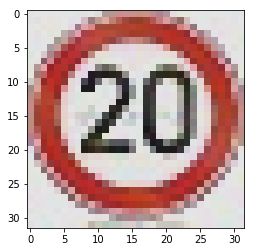

Speed limit (20km/h)
----------------------------------------------------------------------------------------------------
   ClassID                     SignName  Probabilities
1        3         Speed limit (60km/h)       0.595661
2        1         Speed limit (30km/h)       0.307691
3        5         Speed limit (80km/h)       0.091261
4        6  End of speed limit (80km/h)       0.005370
5        0         Speed limit (20km/h)       0.000016
----------------------------------------------------------------------------------------------------


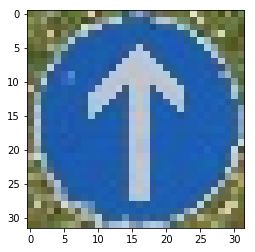

Ahead only
----------------------------------------------------------------------------------------------------
   ClassID              SignName  Probabilities
1       35            Ahead only   1.000000e+00
2       34       Turn left ahead   1.935015e-13
3       41     End of no passing   1.012521e-15
4        5  Speed limit (80km/h)   6.031660e-18
5        9            No passing   3.790706e-18
----------------------------------------------------------------------------------------------------


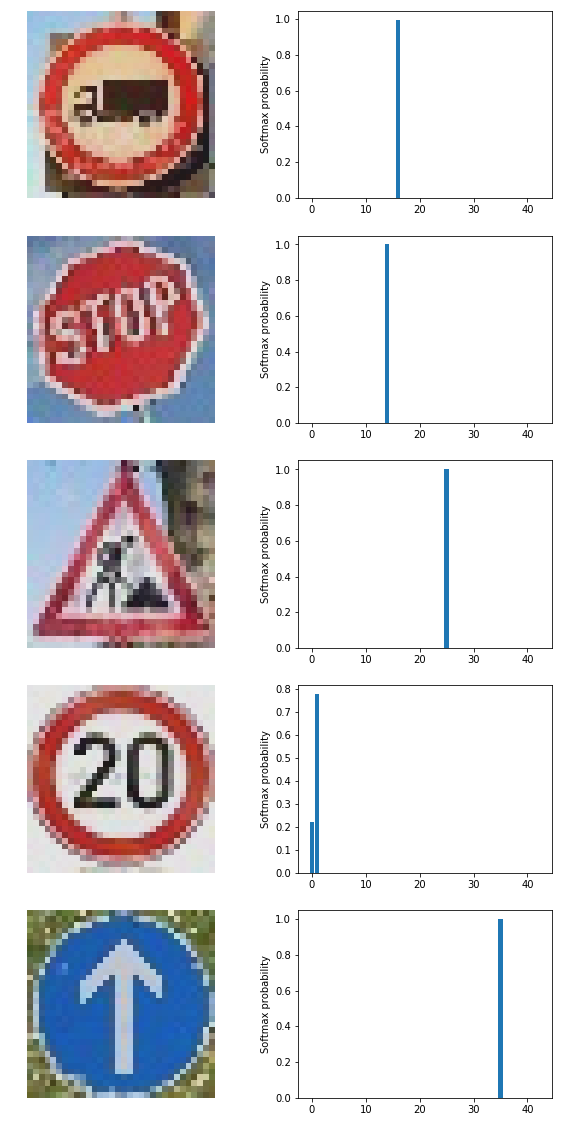

In [27]:
# Visualize the prediction result #1
for i in range(5):
    plt.imshow(my_images[i])
    plt.show()
    print(df.iloc[my_labels[i]].SignName)
    print('-'*100)
    print(pd.DataFrame(new_image_dframe[i],index=range(1,6), columns=['ClassID', 'SignName', 'Probabilities']))
    print('-'*100)
    
# Visualize the prediction result #2
fig, axs = plt.subplots(5,2, figsize=(10,20))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(my_images[i//2])
    else:
        axs[i].bar(range(n_classes), my_softmax_logits[(i-1)//2])
        axs[i].set_ylabel('Softmax probability')
plt.show()    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [28]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=tf.get_default_session(), feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(30,30))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

My Test Image shape: (32, 32, 3)

Shaped My Test Image shape: (1, 32, 32, 3)

 My Test Image


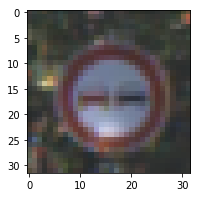


The 6 Feature Maps of the First Convolutional Layer


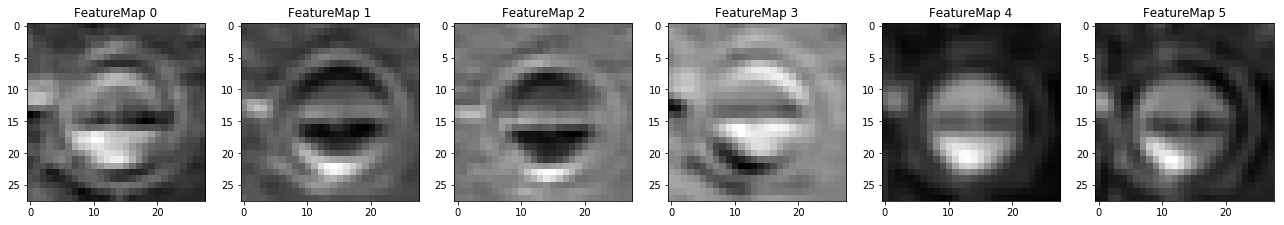


The 16 Feature Maps of the Second Convolutional Layer


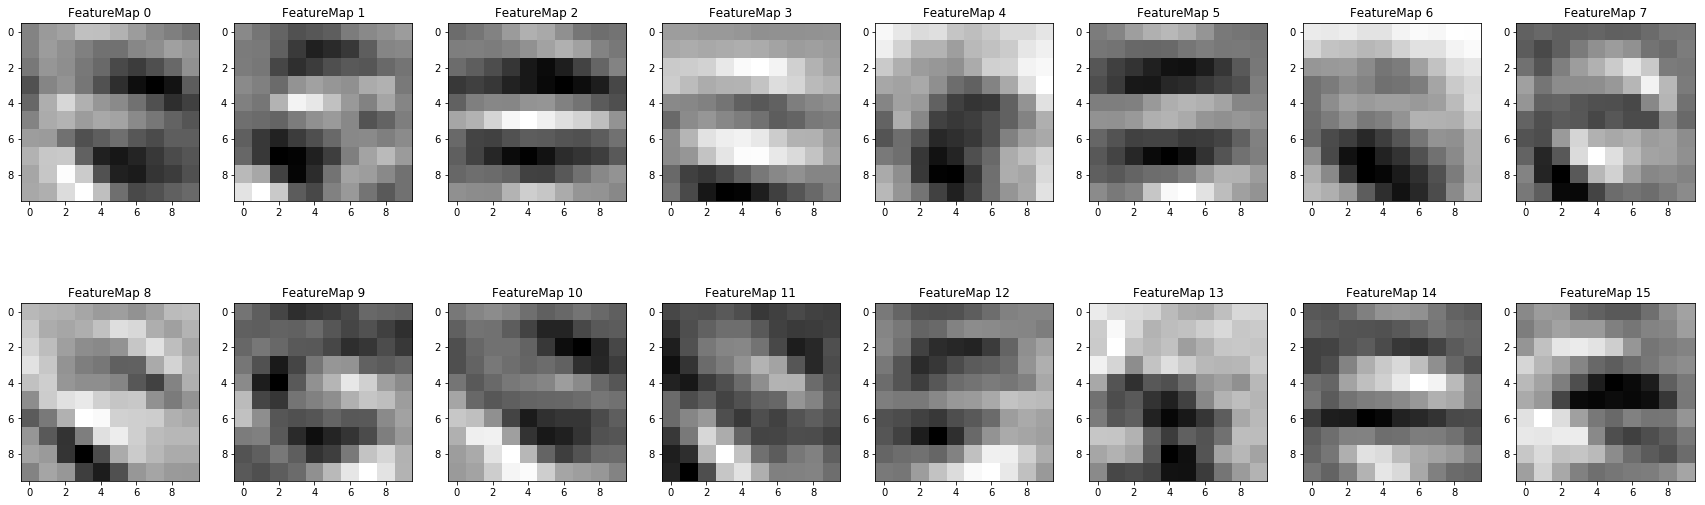

In [29]:
my_test_image = X_train[108]
print("My Test Image shape:", my_test_image.shape)
test_image_shaped = np.reshape(my_test_image, (1,) + my_test_image.shape)
print("\nShaped My Test Image shape:", test_image_shaped.shape)

plt.figure(figsize=(3,3))
print("\n My Test Image")
plt.imshow(test_image_shaped.squeeze())
plt.show()

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./my-model-graph.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_conv1 = tf.get_default_graph().get_tensor_by_name('Convolution1:0')
    print("\nThe 6 Feature Maps of the First Convolutional Layer")
    outputFeatureMap(test_image_shaped, my_conv1)
    plt.show()
    print("\nThe 16 Feature Maps of the Second Convolutional Layer")
    my_conv2 = tf.get_default_graph().get_tensor_by_name('Convolution2:0')
    outputFeatureMap(test_image_shaped, my_conv2)
    plt.show()